In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

tag_df = pd.read_csv("products_benefit_disadv.csv")
tag_df.head()

df = tag_df[["product_name", "benefits"]].copy()



In [ ]:
tag_df["benefits"].head(10)


,benefits
0,"hydrating, lightweight, natural, buildable, sm..."
1,"hydrating, lightweight, non-greasy, soothing, ..."
2,"hydrating, lightweight, fragrance-free, fast-a..."
3,"hydrating, lightweight, long-wearing, natural,..."
4,"hydrating, lightweight, nourishing, fragrance-..."
5,"long-wearing, full coverage, lightweight, matt..."
6,"hydrating, lightweight, smooth, radiant, fragr..."
7,"matte, high-coverage, blurs, long-wearing, lig..."
8,"hydrating, lightweight, smooth, silky, fragran..."
9,"hydrating, lightweight, moisturizing, smooth, ..."


In [ ]:
def convert_benefits(text):
    if pd.isna(text):
        return []
    return [w.strip() for w in text.split(",") if w.strip()]

tag_df["benefits_list"] = tag_df["benefits"].apply(convert_benefits)


In [ ]:
tag_df["benefits_list"].head()


,benefits_list
0,"[hydrating, lightweight, natural, buildable, s..."
1,"[hydrating, lightweight, non-greasy, soothing,..."
2,"[hydrating, lightweight, fragrance-free, fast-..."
3,"[hydrating, lightweight, long-wearing, natural..."
4,"[hydrating, lightweight, nourishing, fragrance..."


In [ ]:
df = tag_df[["product_name", "benefits_list"]].copy()
df["benefit_text"] = df["benefits_list"].apply(lambda x: " ".join(x))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vect = TfidfVectorizer()
X = vect.fit_transform(df["benefit_text"])

sim = cosine_similarity(X)
sim_df = pd.DataFrame(sim, index=df["product_name"], columns=df["product_name"])
sim_df


product_name,Armani Luminous Foundation,BYOMA Moisturizing Rich Cream,Clinique Dramatically Different Moisturizing Lotion+,Dior Forever Skin Glow,Drunk Elephant Lala Retro Whipped Moisturizer,Estée Lauder Double Wear,Estée Lauder Revitalizing Supreme+ Global Anti-Aging Cream,Fenty Pro Filt'r Soft Matte Foundation,Kiehl’s Ultra Facial Moisturizing Cream with Squalane,Lancôme Rénergie H.P.N. 300-Peptide Cream,Lancôme Teint Idole Ultra Wear Foundation,NARS Light Reflecting Foundation
product_name,,,,,,,,,,,,
Armani Luminous Foundation,1.000000,0.127772,0.116016,0.740544,0.127772,0.314075,0.206950,0.264973,0.214819,0.206950,0.440694,0.597422
BYOMA Moisturizing Rich Cream,0.127772,1.000000,0.378711,0.071634,0.574136,0.050525,0.334131,0.019500,0.346835,0.334131,0.170318,0.057790
Clinique Dramatically Different Moisturizing Lotion+,0.116016,0.378711,1.000000,0.065043,0.378711,0.045876,0.303388,0.017705,0.482843,0.303388,0.154647,0.052473
Dior Forever Skin Glow,0.740544,0.071634,0.065043,1.000000,0.071634,0.355438,0.294869,0.299869,0.306081,0.294869,0.498733,0.676102
Drunk Elephant Lala Retro Whipped Moisturizer,0.127772,0.574136,0.378711,0.071634,1.000000,0.050525,0.334131,0.019500,0.346835,0.334131,0.170318,0.057790
Estée Lauder Double Wear,0.314075,0.050525,0.045876,0.355438,0.050525,1.000000,0.106807,0.430465,0.110868,0.106807,0.389226,0.286744
Estée Lauder Revitalizing Supreme+ Global Anti-Aging Cream,0.206950,0.334131,0.303388,0.294869,0.334131,0.106807,1.000000,0.022121,0.753576,0.725973,0.248143,0.122165
Fenty Pro Filt'r Soft Matte Foundation,0.264973,0.019500,0.017705,0.299869,0.019500,0.430465,0.022121,1.000000,0.022962,0.022121,0.539246,0.241915
Kiehl’s Ultra Facial Moisturizing Cream with Squalane,0.214819,0.346835,0.482843,0.306081,0.346835,0.110868,0.753576,0.022962,1.000000,0.753576,0.257578,0.126810


In [ ]:
foundations = [
    "Armani Luminous Foundation",
    "Dior Forever Skin Glow",
    "NARS Light Reflecting Foundation",
    "Estée Lauder Double Wear",
    "Lancôme Teint Idole Ultra Wear Foundation",
    "Fenty Pro Filt'r Soft Matte Foundation"
]

moisturizers = [
    "BYOMA Moisturizing Rich Cream",
    "Clinique Dramatically Different Moisturizing Lotion+",
    "Drunk Elephant Lala Retro Whipped Moisturizer",
    "Estée Lauder Revitalizing Supreme+ Global Anti-Aging Cream",
    "Lancôme Rénergie H.P.N. 300-Peptide Cream",
    "Kiehl’s Ultra Facial Moisturizing Cream with Squalane"
]


In [ ]:
sim_moist = sim_df.loc[moisturizers, moisturizers]
sim_found = sim_df.loc[foundations, foundations]


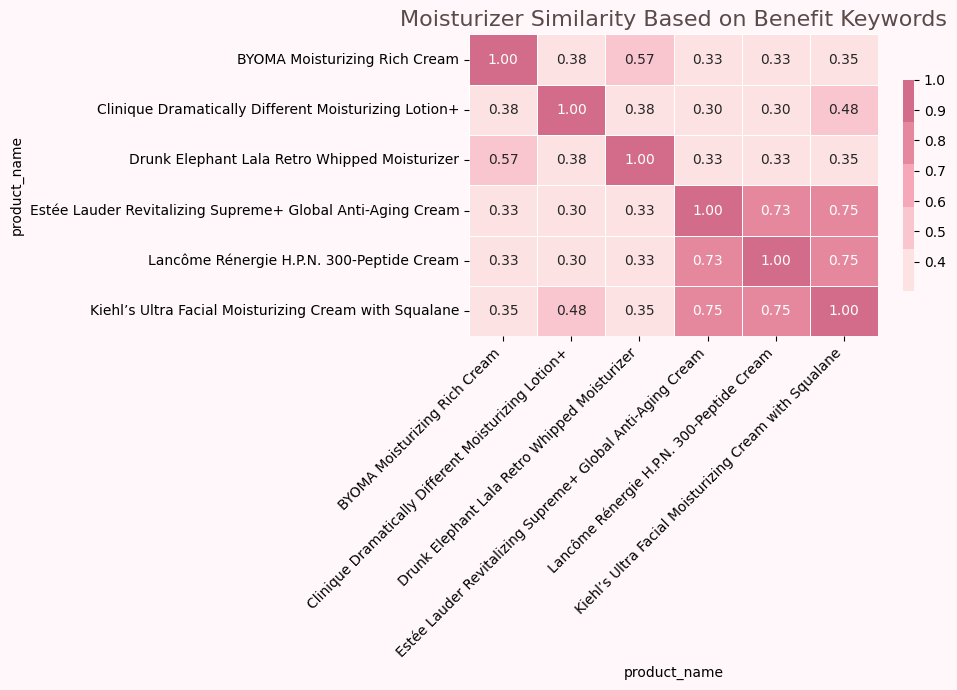

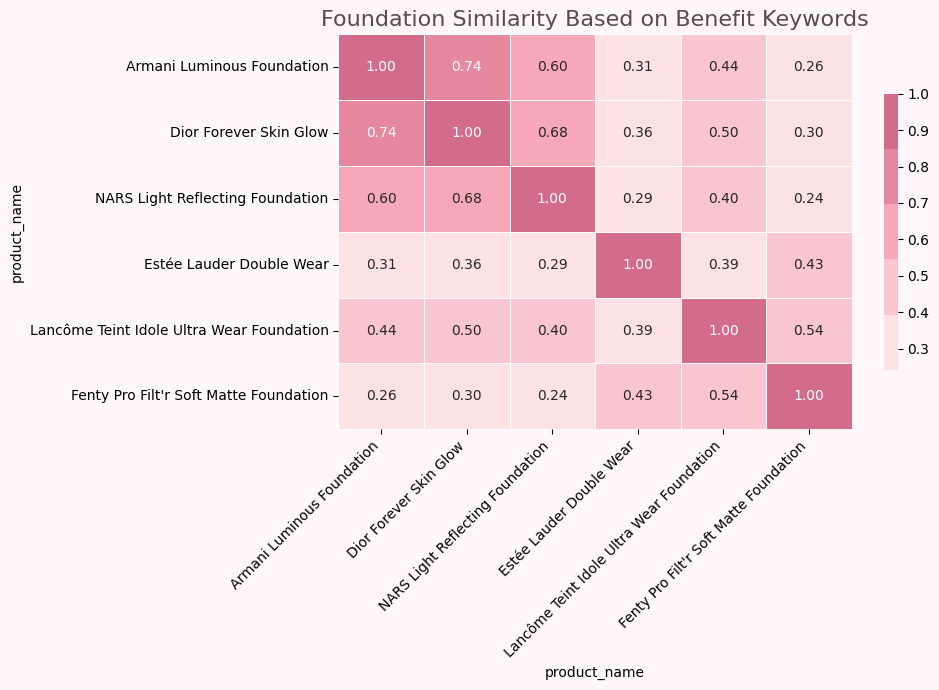

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Soft pink theme
plt.rcParams.update({
    "figure.facecolor": "#FFF7FA",
    "axes.facecolor": "#FFF7FA",
    "savefig.facecolor": "#FFF7FA",
    "font.family": "DejaVu Sans"
})

pink_cmap = sns.color_palette(["#FDE2E4", "#F9C6D0", "#F7A8B8", "#E5889E", "#D36B8A"], as_cmap=True)

# ===========================
#  MOISTURIZERS HEATMAP
# ===========================
plt.figure(figsize=(10, 7))
sns.heatmap(
    sim_moist,
    annot=True,
    fmt=".2f",
    cmap=pink_cmap,
    linewidths=0.5,
    linecolor="#ffffff",
    cbar_kws={"shrink": 0.7}
)
plt.title("Moisturizer Similarity Based on Benefit Keywords", fontsize=16, color="#5A4A4A")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ===========================
#  FOUNDATIONS HEATMAP
# ===========================
plt.figure(figsize=(10, 7))
sns.heatmap(
    sim_found,
    annot=True,
    fmt=".2f",
    cmap=pink_cmap,
    linewidths=0.5,
    linecolor="#ffffff",
    cbar_kws={"shrink": 0.7}
)
plt.title("Foundation Similarity Based on Benefit Keywords", fontsize=16, color="#5A4A4A")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
